In [ ]:
!pip install scikit-learn

# 머신러닝

### scikit-learn을 활용한 머신러닝
[scikit-learn](https://scikit-learn.org/stable/index.html)

- 데이터를 직접 탐색하여 분석하는 방식이 아닌 모델을 활용하여 추론
- 각종 통계 알고리즘을 활용한 모델부터 심층신경망(딥러닝) 모델까지 다양한 모델이 있음
- scikit-learn 에선 다양한 수학적 머신러닝 모델과 전처리 기능을 제공

<br>
<hr>
<br>

## Exited 예측해보기

In [1]:
import pandas as pd
df_cm = pd.read_csv('data/Churn_Modeling.csv')
df_cm

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### StandardScaler 데이터 전처리

C:\Users\trave\AppData\Local\Temp\ipykernel_47264\995273018.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1,3,1)


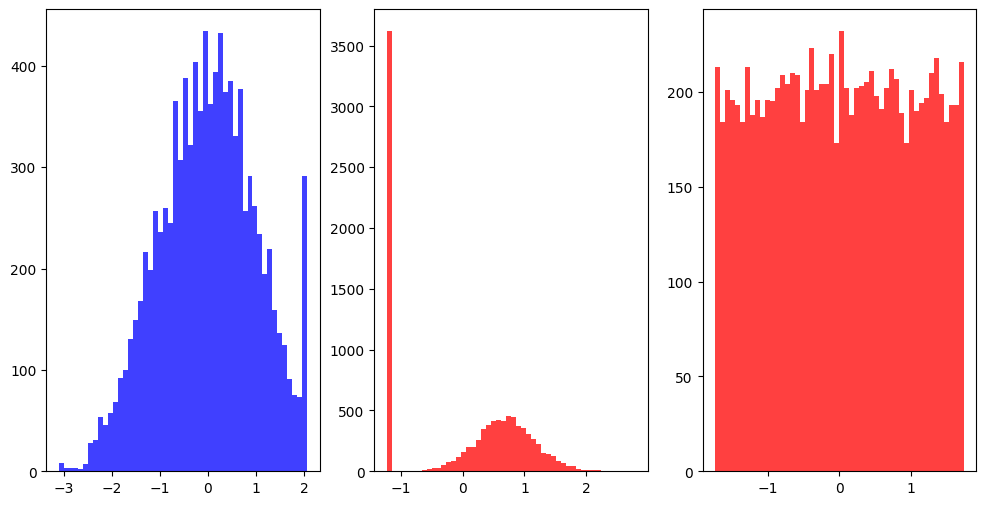

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df_cm[['CreditScore','Balance','EstimatedSalary']]
scaler = StandardScaler()
scaler.fit(X)

trans_X = scaler.transform(X)
plt.subplots(figsize=(12, 6))
ax1 = plt.subplot(1,3,1)
ax1.hist(trans_X[:,0], 50, facecolor='b', alpha=0.75)
ax2 = plt.subplot(1,3,2)
ax2.hist(trans_X[:,1], 50, facecolor='r', alpha=0.75)
ax3 = plt.subplot(1,3,3)
ax3.hist(trans_X[:,2], 50, facecolor='r', alpha=0.75)
plt.show()

### DecisionTreeRegressor 학습하기

In [3]:
from sklearn import tree
y = df_cm['Exited'].to_numpy()

train_X = trans_X[:9000]
train_y = y[:9000]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X, train_y)


### DecisionTreeRegressor 추론하기

In [4]:
test_X = trans_X[9000:]
test_y = y[9000:]

predict = clf.predict(test_X)
predict[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### 예측 결과의 지표 확인하기

In [5]:
# f1_score 지표 확인
from sklearn.metrics import f1_score
f1_score(test_y,predict, average=None)

array([0.80821918, 0.21827411])

In [6]:
# 정확도 지표 확인
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predict)

0.692

## 범주형 데이터를 포함하여 성능향상

In [7]:
iX = df_cm[['CreditScore','Balance','EstimatedSalary']]
scaler = StandardScaler()
scaler.fit(iX)
trans_iX = scaler.transform(iX)
trans_iX.shape

(10000, 3)

### OneHotEncoder 범주형 데이터 전처리

In [10]:
from sklearn.preprocessing import OneHotEncoder

cX = df_cm[['Geography', 'Gender', 'NumOfProducts']]
enc = OneHotEncoder()
enc.fit(cX)

trans_cX = enc.transform(cX).toarray()
trans_cX

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### 데이터의 결합

In [9]:
import numpy as np
trans_X = np.concatenate([trans_iX,trans_cX], axis = 1)
trans_X.shape

(10000, 12)

In [11]:
from sklearn import tree
y = df_cm['Exited'].to_numpy()

train_X = trans_X[:9000]
train_y = y[:9000]
test_X = trans_X[9000:]
test_y = y[9000:]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X, train_y)

predict = clf.predict(test_X)
accuracy_score(test_y, predict)

0.769